In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
import os
import igraph as ig
import arw
import utils
import random
import time

random.seed(time.time())

### Load network dataset and extract ARW input data

In [60]:
path = './datasets/acl.pkl'
network = ig.Graph.Read_Pickle(path)
print network.summary()

attr = 'single_attr' if network['attributed'] else None
input_data = utils.extract_arw_input_data(network, 'time', 0.00, 0.01, debug=False, attrs=attr)

IGRAPH DN-- 18665 115311 -- 
+ attr: attributed (g), attributes (g), single_attr (g), attrs (v), id (v), name (v), single_attr (v), time (v), venue_id (v)


### Generate ARW graph with fitted parameters

In [61]:
params = dict(p_diff=0.08, p_same=0.06, jump=0.42, out=1)

arw_graph = arw.RandomWalkSingleAttribute(params['p_diff'], params['p_same'], 
                                          params['jump'], params['out'], 
                                          input_data['gpre'], attr_name=attr)

arw_graph.add_nodes(input_data['chunk_sizes'], input_data['mean_outdegs'], 
                    chunk_attr_sampler=input_data['chunk_sampler'] if attr else None)

arw_graphs[network] = arw_graph

Total chunks: 44
3 7 11 15 19 23 27 31 35 39 43 
IGRAPH D--- 18665 119370 -- 
+ attr: chunk_id (v), single_attr (v)


### Compare graph statistics

ARW: 0.063
Dataset: 0.067


(<Figure size 1800x432 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1239b30d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x124437710>))

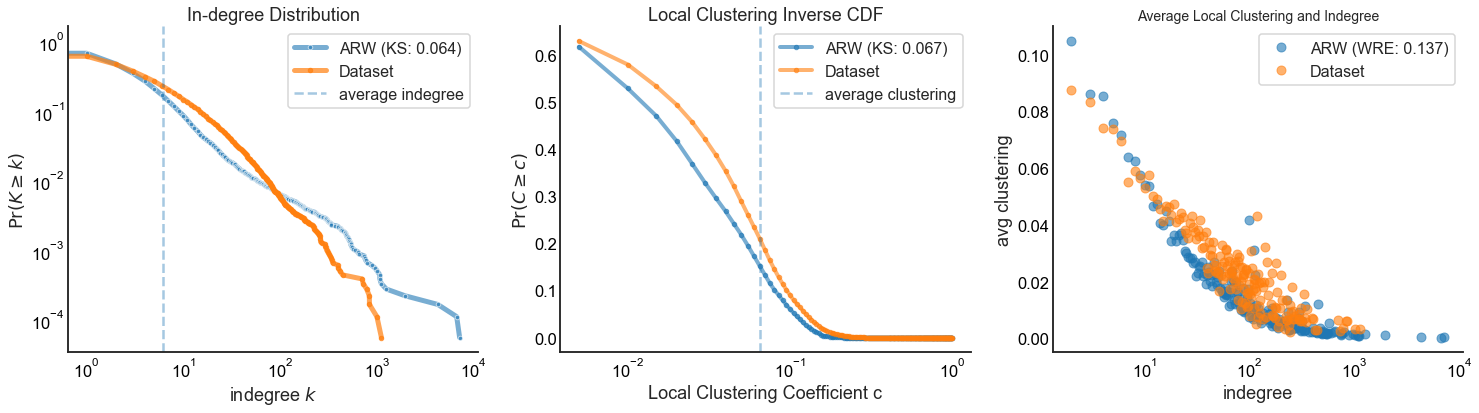

In [63]:
utils.plot_deg_and_cc_and_deg_cc([arw_graph.g, network], ['ARW', 'Dataset'], get_atty=network['attributed'])